In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
#%matplotlib notebook

## Construct Gaussian initial fluctuations

In [49]:
nx = ny = nz = 64
lx = ly = lz = 30.0
N = 10.0

ntot = nx*ny*nz
ltot = lx*ly*lz

kx = np.fft.fftfreq(nx)*nx*2*np.pi/lx
ky = np.fft.fftfreq(ny)*ny*2*np.pi/ly
kz = np.fft.fftfreq(nz)*nz*2*np.pi/lz
mg = np.meshgrid(kx,ky,kz,indexing='ij')
ksq = sum(m**2 for m in mg)
phase = np.random.uniform(0., 2.*np.pi, ksq.shape)
psi_k = np.sqrt(np.exp(-ksq))*np.exp(1j*phase)
psi = np.fft.ifftn(psi_k)
av = sum(np.abs(psi.reshape(ntot))**2)*ltot/ntot
psi = psi*np.sqrt(N/av)

real = psi.real.reshape(ntot)
imag = psi.imag.reshape(ntot)
np.savetxt('initial.txt', np.column_stack((real,imag)))

## Check initial amplitude (Fig.1a in Levkov et.al.)

N = 10.000000000000222
n = 0.0003703703703703786
tau_gr = 7331.997958842231


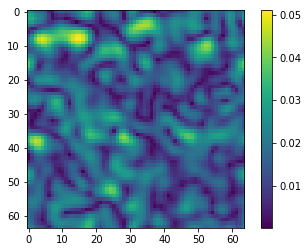

In [50]:
amp = np.abs(psi).reshape(ntot)
print("N =",sum(amp**2)*ltot/ntot)
print("n =",sum(amp**2)/ntot)
print("tau_gr =",0.9*np.sqrt(2.0)/12.0/np.pi**3*(ltot/N)**2/np.log(lx))
plt.imshow((amp[:nx*ny]).reshape((nx,ny)), interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

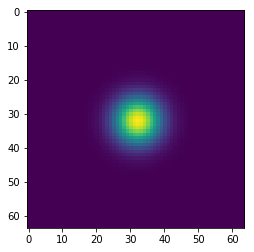

In [51]:
psitest = np.abs(np.fft.fftshift(np.fft.fftn(psi)))
plt.imshow(np.array(psitest[32]), interpolation="nearest", origin="upper")

## Evolution of global quantities

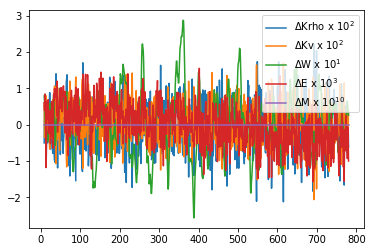

In [69]:
data = np.transpose(np.loadtxt('/home/uni09/cosmo/bschwab/axionyx/condensation2/runlog', skiprows=10))

nstep = data[0]
time = data[1]
dt = data[2]
z = data[3]
mass_av = sum(data[4])/len(data[4])
mass = (data[4]-mass_av)/mass_av
epot_av = sum(data[5])/len(data[5])
epot = (data[5]-epot_av)/epot_av
ekinrho_av = sum(data[6])/len(data[6])
ekinrho = (data[6]-ekinrho_av)/ekinrho_av
ekinv_av = sum(data[7])/len(data[7])
ekinv = (data[7]-ekinv_av)/ekinv_av
etot_av = sum(data[8])/len(data[8])
etot = (data[8]-etot_av)/etot_av
max_dens = data[9]
a = data[10]


plt.plot(time,ekinrho*1.e+2,label='$\Delta$Krho x $10^2$')
plt.plot(time,ekinv*1.e+2,label='$\Delta$Kv x $10^2$')
plt.plot(time,epot*1.e+1,label='$\Delta$W x $10^1$')
plt.plot(time,etot*1.e+3,label='$\Delta$E x $10^3$')
plt.plot(time,mass*1.e+10,label='$\Delta$M x $10^{10}$')

#plt.ylim([-3.5,3.5])
plt.legend()

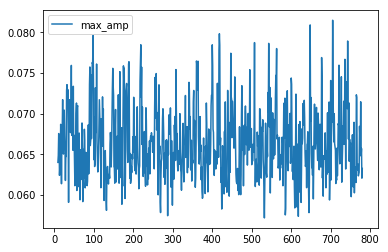

In [70]:
plt.plot(time,np.sqrt(max_dens),label='max_amp')
plt.legend()

## Construct energy spectrum F($\omega$,t)

In [ ]:
def F(nstep,omega,tau):
    ts = yt.load("/home/uni09/cosmo/bschwab/axionyx/condensation2/plt?????")[nstep:750] #change to your path
    dst = ts[0]
    dt = ts[1].current_time.v-ts[0].current_time.v
    return sum([(sum((dst.all_data()[("boxlib","AxRe")].v-1j*np.array(dst.all_data()[("boxlib","AxIm")].v))
                     *(ds.all_data()[("boxlib","AxRe")].v+1j*np.array(ds.all_data()[("boxlib","AxIm")].v)))
            *np.exp(1j*omega*(ds.current_time.v-dst.current_time.v)
                    -(ds.current_time.v-dst.current_time.v)**2/tau**2)) 
                for ds in ts])*lx/nx*ly/ny*lz/nz/2.0/np.pi*dt/N

nstep = 0 #index of first used plot file - corresponds to time t=plotfile[nstep].current_time
omega = np.linspace(-1.0, 1.0, num=20)
tau = 100.0

F = F(nstep,omega,tau)
print(F)

yt : [INFO     ] 2019-05-31 16:33:06,376 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-31 16:33:06,377 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:33:06,378 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:33:06,379 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:33:06,434 Parameters: current_time              = 1.0
yt : [INFO     ] 2019-05-31 16:33:06,435 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:33:06,436 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:33:06,437 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:33:06,461 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-31 16:33:06,461 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:33:06,462 Parameters: domain_left_edge          = [0. 0. 0.]
yt 

yt : [INFO     ] 2019-05-31 16:33:32,564 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:33:32,566 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:33:33,944 Parameters: current_time              = 20.0
yt : [INFO     ] 2019-05-31 16:33:33,945 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:33:33,946 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:33:33,947 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:33:35,388 Parameters: current_time              = 21.0
yt : [INFO     ] 2019-05-31 16:33:35,390 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:33:35,391 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:33:35,392 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:33:36,613 Parameters: current_time              = 22

yt : [INFO     ] 2019-05-31 16:34:00,327 Parameters: current_time              = 42.0
yt : [INFO     ] 2019-05-31 16:34:00,328 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:00,330 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:34:00,332 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:34:01,437 Parameters: current_time              = 43.0
yt : [INFO     ] 2019-05-31 16:34:01,438 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:01,439 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:34:01,441 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:34:02,646 Parameters: current_time              = 44.0
yt : [INFO     ] 2019-05-31 16:34:02,647 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:02,648 Parameters: domain_left_edge          = [0. 0. 0.]


yt : [INFO     ] 2019-05-31 16:34:26,141 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:34:26,142 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:34:27,307 Parameters: current_time              = 65.0
yt : [INFO     ] 2019-05-31 16:34:27,308 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:27,309 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:34:27,310 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:34:28,315 Parameters: current_time              = 66.0
yt : [INFO     ] 2019-05-31 16:34:28,316 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:28,317 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:34:28,319 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:34:29,399 Parameters: current_time              = 67

yt : [INFO     ] 2019-05-31 16:34:53,011 Parameters: current_time              = 87.0
yt : [INFO     ] 2019-05-31 16:34:53,013 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:53,015 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:34:53,016 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:34:54,227 Parameters: current_time              = 88.0
yt : [INFO     ] 2019-05-31 16:34:54,229 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:54,230 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:34:54,231 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:34:55,400 Parameters: current_time              = 89.0
yt : [INFO     ] 2019-05-31 16:34:55,402 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:34:55,404 Parameters: domain_left_edge          = [0. 0. 0.]


yt : [INFO     ] 2019-05-31 16:35:20,609 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:35:20,611 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:35:22,020 Parameters: current_time              = 110.0
yt : [INFO     ] 2019-05-31 16:35:22,027 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:35:22,028 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:35:22,030 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:35:23,220 Parameters: current_time              = 111.0
yt : [INFO     ] 2019-05-31 16:35:23,223 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:35:23,224 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:35:23,226 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:35:24,452 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:35:47,278 Parameters: current_time              = 132.0
yt : [INFO     ] 2019-05-31 16:35:47,279 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:35:47,280 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:35:47,281 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:35:48,424 Parameters: current_time              = 133.0
yt : [INFO     ] 2019-05-31 16:35:48,426 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:35:48,427 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:35:48,427 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:35:49,516 Parameters: current_time              = 134.0
yt : [INFO     ] 2019-05-31 16:35:49,517 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:35:49,517 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:36:13,011 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:36:13,013 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:36:14,177 Parameters: current_time              = 155.0
yt : [INFO     ] 2019-05-31 16:36:14,178 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:36:14,179 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:36:14,180 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:36:15,309 Parameters: current_time              = 156.0
yt : [INFO     ] 2019-05-31 16:36:15,310 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:36:15,311 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:36:15,312 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:36:16,359 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:36:39,455 Parameters: current_time              = 177.0
yt : [INFO     ] 2019-05-31 16:36:39,456 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:36:39,457 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:36:39,459 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:36:40,644 Parameters: current_time              = 178.0
yt : [INFO     ] 2019-05-31 16:36:40,645 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:36:40,646 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:36:40,647 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:36:41,816 Parameters: current_time              = 179.0
yt : [INFO     ] 2019-05-31 16:36:41,818 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:36:41,818 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:37:04,280 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:04,281 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:05,202 Parameters: current_time              = 200.0
yt : [INFO     ] 2019-05-31 16:37:05,203 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:37:05,204 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:05,206 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:06,362 Parameters: current_time              = 201.0
yt : [INFO     ] 2019-05-31 16:37:06,364 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:37:06,365 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:06,366 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:07,416 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:37:29,562 Parameters: current_time              = 222.0
yt : [INFO     ] 2019-05-31 16:37:29,564 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:37:29,566 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:29,567 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:30,705 Parameters: current_time              = 223.0
yt : [INFO     ] 2019-05-31 16:37:30,707 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:37:30,708 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:30,709 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:31,777 Parameters: current_time              = 224.0
yt : [INFO     ] 2019-05-31 16:37:31,778 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:37:31,779 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:37:55,060 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:55,061 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:56,079 Parameters: current_time              = 245.0
yt : [INFO     ] 2019-05-31 16:37:56,081 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:37:56,082 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:56,083 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:57,222 Parameters: current_time              = 246.0
yt : [INFO     ] 2019-05-31 16:37:57,224 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:37:57,225 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:37:57,226 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:37:58,432 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:38:20,138 Parameters: current_time              = 267.0
yt : [INFO     ] 2019-05-31 16:38:20,139 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:38:20,141 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:38:20,142 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:38:21,051 Parameters: current_time              = 268.0
yt : [INFO     ] 2019-05-31 16:38:21,052 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:38:21,053 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:38:21,054 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:38:22,078 Parameters: current_time              = 269.0
yt : [INFO     ] 2019-05-31 16:38:22,079 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:38:22,080 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:38:43,090 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:38:43,091 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:38:44,181 Parameters: current_time              = 290.0
yt : [INFO     ] 2019-05-31 16:38:44,184 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:38:44,186 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:38:44,187 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:38:45,202 Parameters: current_time              = 291.0
yt : [INFO     ] 2019-05-31 16:38:45,203 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:38:45,204 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:38:45,205 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:38:46,397 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:39:07,468 Parameters: current_time              = 312.0
yt : [INFO     ] 2019-05-31 16:39:07,470 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:07,471 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:39:07,472 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:39:08,420 Parameters: current_time              = 313.0
yt : [INFO     ] 2019-05-31 16:39:08,421 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:08,422 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:39:08,423 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:39:09,438 Parameters: current_time              = 314.0
yt : [INFO     ] 2019-05-31 16:39:09,439 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:09,440 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:39:30,314 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:39:30,315 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:39:31,338 Parameters: current_time              = 335.0
yt : [INFO     ] 2019-05-31 16:39:31,339 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:31,340 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:39:31,341 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:39:32,286 Parameters: current_time              = 336.0
yt : [INFO     ] 2019-05-31 16:39:32,287 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:32,288 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:39:32,289 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:39:33,486 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:39:53,799 Parameters: current_time              = 357.0
yt : [INFO     ] 2019-05-31 16:39:53,800 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:53,801 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:39:53,802 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:39:54,736 Parameters: current_time              = 358.0
yt : [INFO     ] 2019-05-31 16:39:54,737 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:54,738 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:39:54,740 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:39:55,679 Parameters: current_time              = 359.0
yt : [INFO     ] 2019-05-31 16:39:55,680 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:39:55,681 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:40:15,873 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:40:15,874 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:40:16,923 Parameters: current_time              = 380.0
yt : [INFO     ] 2019-05-31 16:40:16,925 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:40:16,926 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:40:16,927 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:40:17,839 Parameters: current_time              = 381.0
yt : [INFO     ] 2019-05-31 16:40:17,841 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:40:17,842 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:40:17,844 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:40:18,828 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:40:39,059 Parameters: current_time              = 402.0
yt : [INFO     ] 2019-05-31 16:40:39,060 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:40:39,061 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:40:39,062 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:40:40,050 Parameters: current_time              = 403.0
yt : [INFO     ] 2019-05-31 16:40:40,051 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:40:40,052 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:40:40,053 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:40:41,253 Parameters: current_time              = 404.0
yt : [INFO     ] 2019-05-31 16:40:41,254 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:40:41,255 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:41:03,701 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:41:03,702 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:41:04,826 Parameters: current_time              = 425.0
yt : [INFO     ] 2019-05-31 16:41:04,827 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:41:04,828 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:41:04,829 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:41:05,962 Parameters: current_time              = 426.0
yt : [INFO     ] 2019-05-31 16:41:05,963 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:41:05,964 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:41:05,964 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:41:06,948 Parameters: current_time              = 

yt : [INFO     ] 2019-05-31 16:41:29,226 Parameters: current_time              = 447.0
yt : [INFO     ] 2019-05-31 16:41:29,226 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:41:29,227 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:41:29,228 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:41:30,318 Parameters: current_time              = 448.0
yt : [INFO     ] 2019-05-31 16:41:30,319 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:41:30,320 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:41:30,321 Parameters: domain_right_edge         = [30. 30. 30.]
yt : [INFO     ] 2019-05-31 16:41:31,579 Parameters: current_time              = 449.0
yt : [INFO     ] 2019-05-31 16:41:31,580 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-31 16:41:31,581 Parameters: domain_left_edge          = [0. 0. 0

yt : [INFO     ] 2019-05-31 16:41:52,926 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2019-05-31 16:41:52,927 Parameters: domain_right_edge         = [30. 30. 30.]


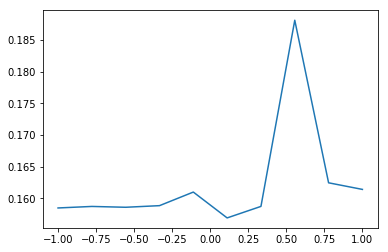

In [68]:
plt.plot(omega,np.abs(np.array(F)))